FastF1 Getting Started: https://docs.fastf1.dev/examples/index.html

In [27]:
# Instalação do FastF1 (caso ainda não tenha instalado)

#!pip install fastf1
#!pip install colormap
#!pip install mplcyberpunk
#!pip install pandas

In [28]:
# Importando as bibliotecas necessárias
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import pandas as pd
import logging


In [29]:
# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(


#### Tipos de Sessões e Exemplos

FP1: Primeiro treino livre.
FP2: Segundo treino livre.
FP3: Terceiro treino livre.

FP4: Quarto treino livre (se aplicável).
S: Corrida de sprint (se aplicável).

Q: Sessão de qualificação.
R: Corrida principal (grande prêmio).

In [30]:
# Load race session data
race = fastf1.get_session(2024, 16, 'R')

# Baixando os dados da sessão
race.load()
laps = race.laps.pick_quicklaps()

# Transform laps to get LapTime in seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

race

2024 Season Round 16: Italian Grand Prix - Race

In [31]:
race.results.iloc[0:10].loc[:, ['Abbreviation', 'Q3']]

,Abbreviation,Q3
16,LEC,NaT
81,PIA,NaT
4,NOR,NaT
55,SAI,NaT
44,HAM,NaT
1,VER,NaT
63,RUS,NaT
11,PER,NaT
23,ALB,NaT
20,MAG,NaT


### Ritmo por equipe na corrida:

Index(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing', 'Aston Martin',
       'Williams', 'Haas F1 Team', 'RB', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


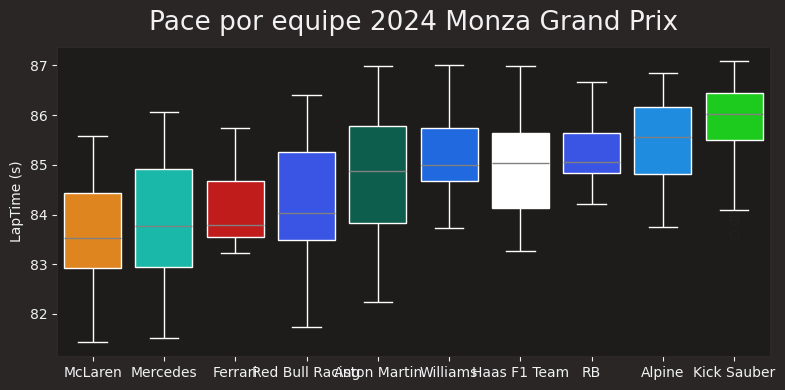

In [32]:
# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
#team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

# Definir um dicionário de cores manualmente se necessário
team_palette = {
    'Mercedes': '#00D2BE',
    'Red Bull Racing': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700',
    'Alpine': '#0090FF',
    'AlphaTauri': '#002F6C',
    'Haas': '#F1F1F1',
    'Aston Martin': '#006B54',
    'Williams': '#0061FF',
    'Alfa Romeo': '#900000',
    'RB': '#1E41FF',
    'Kick Sauber': '#00e701', 
    'Haas F1 Team': '#ffffff'
}

fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("Pace por equipe 2024 Monza Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

#### Ritmo por piloto

Index(['PIA', 'NOR', 'VER', 'HAM', 'LEC', 'SAI', 'RUS', 'PER', 'MAG', 'ALO',
       'STR', 'COL', 'RIC', 'ALB', 'HUL', 'GAS', 'ZHO', 'OCO', 'BOT', 'TSU'],
      dtype='object', name='Driver')
['PIA', 'NOR', 'VER', 'HAM', 'LEC', 'SAI', 'RUS', 'PER', 'MAG', 'ALO', 'STR', 'COL', 'RIC', 'ALB', 'HUL', 'GAS', 'ZHO', 'OCO', 'BOT', 'TSU']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97', 'COL': '#639aff'}


c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


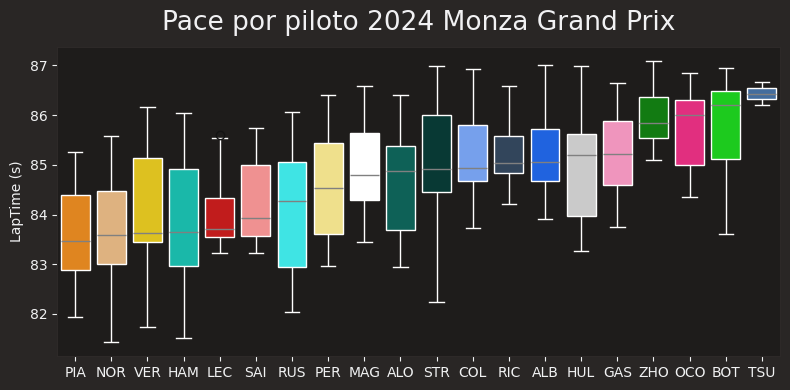

In [33]:
# Order the drivers from the fastest (lowest median lap time) to slower
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

# Create the finishing order with driver abbreviations
finishing_order = [race.get_driver(i)["Abbreviation"] for i in driver_order]
print(finishing_order)

# Create a dictionary mapping driver abbreviations to their colors
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

# Make a color palette associating driver names to hex codes
driver_palette = {driver: driver_colors[driver] for driver in finishing_order}

fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",
    order=driver_order,
    palette=driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("Pace por piloto 2024 Monza Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

#### Distribuição de voltas por compostos de pneu

['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
['LEC', 'PIA', 'NOR', 'SAI', 'HAM', 'VER', 'RUS', 'PER', 'ALB', 'MAG', 'ALO', 'COL', 'RIC', 'OCO', 'GAS', 'BOT', 'HUL', 'ZHO', 'STR', 'TSU']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97', 'COL': '#639aff'}


c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use 

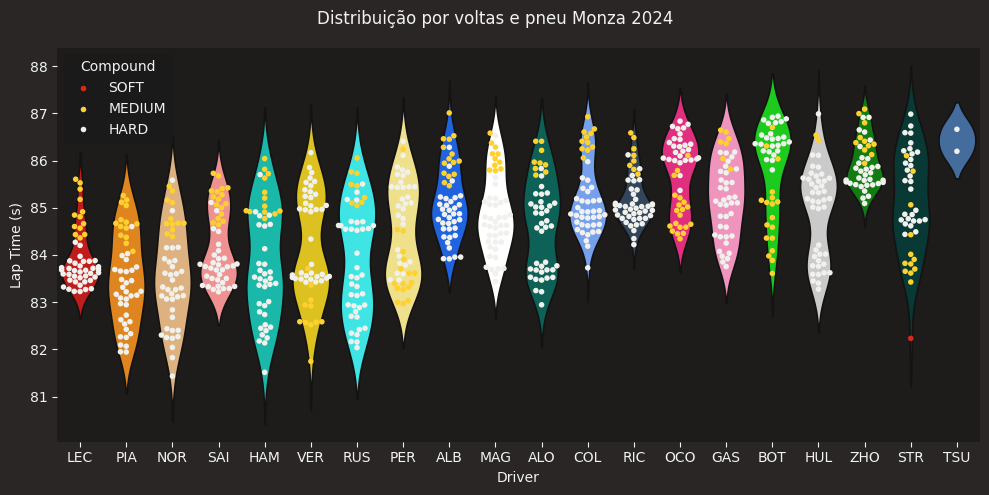

In [34]:
point_finishers = race.drivers[:20]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Distribuição por voltas e pneu Monza 2024")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


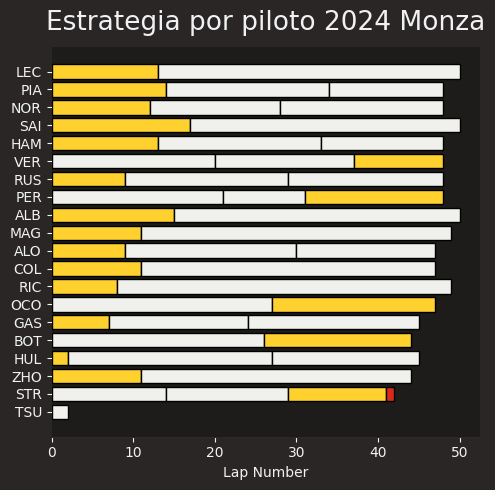

In [35]:
drivers = race.drivers
drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig, ax = plt.subplots(figsize=(5, 5))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("Estrategia por piloto 2024 Monza")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

#### Dispersão dos tempos de volta do P1 e P2:

c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


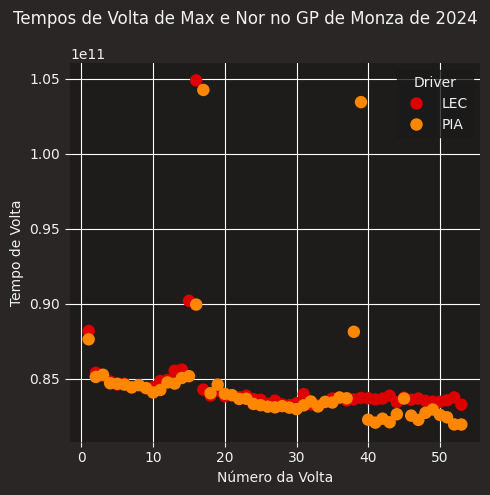

In [36]:
# Seleciona os 10 primeiros colocados
point_finishers = race.drivers[:2]

# Obtém a ordem de chegada dos pilotos
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]

# Obtém os dados de volta para cada piloto e os armazena em uma lista de DataFrames
driver_laps = [race.laps.pick_driver(driver) for driver in finishing_order]

# Combina todos os DataFrames em um único DataFrame
combined_driver_laps = pd.concat(driver_laps)

# Cria o dicionário de cores do motorista
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# Cria a figura
fig, ax = plt.subplots(figsize=(5, 5))

# Plota o gráfico de dispersão
sns.scatterplot(data=combined_driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Driver",
                palette=driver_colors,  # Usa o dicionário de cores do motorista
                s=80,
                linewidth=0,
                legend='auto')

# Define os rótulos dos eixos e o título do gráfico
ax.set_xlabel("Número da Volta")
ax.set_ylabel("Tempo de Volta")
plt.suptitle("Tempos de Volta de Max e Nor no GP de Monza de 2024")

# Inverte o eixo y (o tempo de volta aumenta do topo para a base)
ax.invert_yaxis()

# Ativa as linhas de grade principais
plt.grid(color='w', which='major', axis='both')

# Remove as bordas esquerda e inferior
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#### Filtrar as 25 últimas voltas para aparecerem no gráfico:

c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


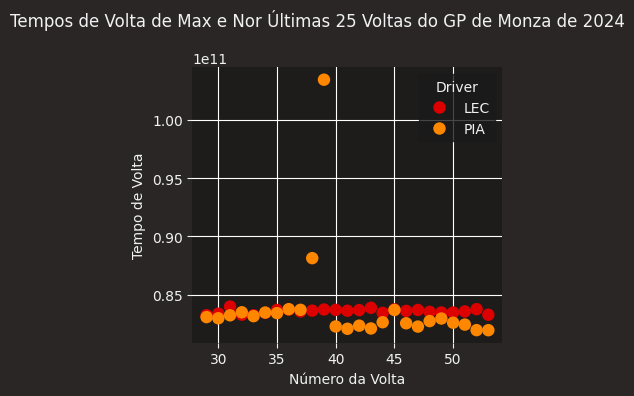

In [37]:
# Filtra apenas as últimas 25 voltas
combined_driver_laps_last_25 = combined_driver_laps[combined_driver_laps['LapNumber'] > combined_driver_laps['LapNumber'].max() - 25]

# Cria o dicionário de cores do motorista
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# Cria a figura
fig, ax = plt.subplots(figsize=(4, 4))

# Plota o gráfico de dispersão
sns.scatterplot(data=combined_driver_laps_last_25,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Driver",
                palette=driver_colors,  # Usa o dicionário de cores do motorista
                s=80,
                linewidth=0,
                legend='auto')

# Define os rótulos dos eixos e o título do gráfico
ax.set_xlabel("Número da Volta")
ax.set_ylabel("Tempo de Volta")
plt.suptitle("Tempos de Volta de Max e Nor Últimas 25 Voltas do GP de Monza de 2024")

# Inverte o eixo y (o tempo de volta aumenta do topo para a base)
ax.invert_yaxis()

# Ativa as linhas de grade principais
plt.grid(color='w', which='major', axis='both')

# Remove as bordas esquerda e inferior
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#### Mapa de calor com as velocidades máximas:

In [38]:
point_finishers = race.drivers[:10]
#print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
#print(finishing_order)
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
#print(driver_colors)


# Defina o nível de log para um nível mais alto para evitar que os avisos sejam exibidos
logging.getLogger('fastf1').setLevel(logging.ERROR)

# Dicionário para armazenar as 15 maiores velocidades máximas de cada piloto
dados = {}

# Iterar sobre cada piloto na lista finishing_order
for piloto in finishing_order:
    # Lista para armazenar as velocidades máximas do piloto
    velocidades_piloto = []

    # Selecionar as voltas do piloto
    laps_driver = race.laps.pick_driver(piloto)

    # Iterar sobre todas as voltas do piloto
    for volta in range(1, 63):  # Supondo que o número total de voltas seja de 1 a 57
        # Selecionar a volta específica do piloto
        volta_driver = laps_driver.pick_laps(volta)

        # Retornar a telemetria e adicionar a coluna de distância
        telemetry_driver = volta_driver.get_telemetry().add_distance()

        # Adicionar a maior velocidade do piloto nesta volta à lista de velocidades do piloto
        velocidades_piloto.append(telemetry_driver.Speed.max())

    # Ordenar as velocidades máximas do piloto em ordem decrescente e selecionar as 15 maiores
    velocidades_piloto = sorted(velocidades_piloto, reverse=True)[:15]

    # Armazenar as 15 maiores velocidades máximas do piloto no dicionário
    dados[piloto] = velocidades_piloto

# Criar um DataFrame com os dados das 15 maiores velocidades máximas de cada piloto
df_velocidades = pd.DataFrame(dados)

# Plotar um mapa de calor usando seaborn
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_velocidades, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mapa de Calor das 15 Maiores Velocidades Máximas dos Pilotos")
plt.xlabel("Piloto")
plt.ylabel("Posição")
plt.show()

c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "
c:\Users\DanaK\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastf1\plotting\__init__.py:82: FutureWarning: DRIVER_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


ValueError: Cannot slice telemetry because self contains no driver number!

#### Comparação Albon e Colapinto

In [ ]:
# Filtrar os pilotos da Williams
williams_drivers = ['ALB', 'COL']  # Lando Norris e Nicholas Latifi, ajuste conforme os pilotos da Williams

# Obtém os dados de volta para os pilotos da Williams
williams_laps = {driver: race.laps.pick_driver(driver) for driver in williams_drivers}

# Combinar os dados dos dois pilotos
combined_laps = pd.concat(williams_laps.values())

# Adicionar uma coluna para o tempo total em segundos
combined_laps['LapTime (s)'] = combined_laps['LapTime'].dt.total_seconds()

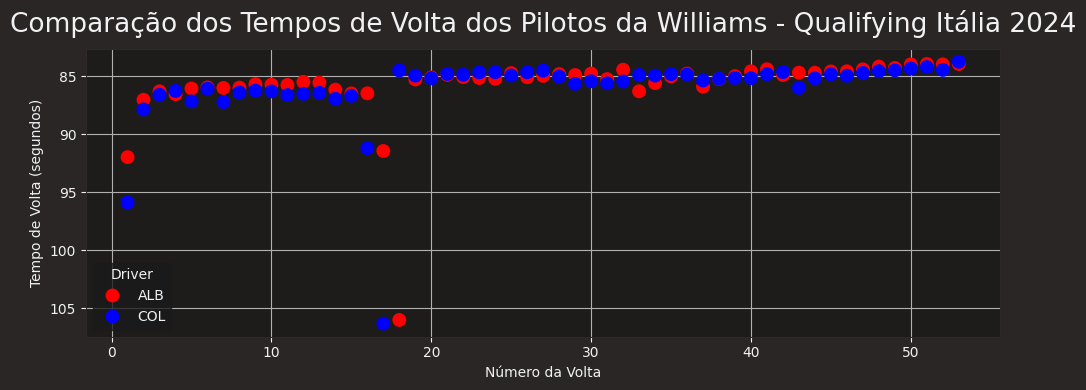

In [ ]:
# Criar o gráfico de comparação dos tempos de volta
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data=combined_laps,
                x='LapNumber',
                y='LapTime (s)',
                hue='Driver',
                palette={'COL': 'blue', 'ALB': 'red'},
                ax=ax,
                s=100,
                linewidth=0)
ax.set_xlabel('Número da Volta')
ax.set_ylabel('Tempo de Volta (segundos)')
ax.set_title('Comparação dos Tempos de Volta dos Pilotos da Williams - Qualifying Itália 2024')
ax.invert_yaxis()  # Inverte o eixo Y para mostrar tempos mais baixos no topo
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calcular deltas de tempo entre os dois pilotos
# Primeiro, garantir que 'LapTime' esteja disponível e corretamente nomeada
for driver in williams_drivers:
    if 'LapTime' not in williams_laps[driver].columns:
        print(f"'LapTime' não encontrado para {driver}")

In [ ]:
# Criação de um DataFrame com os tempos das voltas dos dois pilotos
delta_time = pd.merge(
    williams_laps['ALB'][['LapNumber', 'LapTime']],
    williams_laps['COL'][['LapNumber', 'LapTime']],
    on='LapNumber',
    suffixes=('_ALB', '_COL')
)
delta_time['LapTime (s)_ALB'] = delta_time['LapTime_ALB'].dt.total_seconds()
delta_time['LapTime (s)_COL'] = delta_time['LapTime_COL'].dt.total_seconds()
delta_time['Delta'] = delta_time['LapTime (s)_COL'] - delta_time['LapTime (s)_ALB']

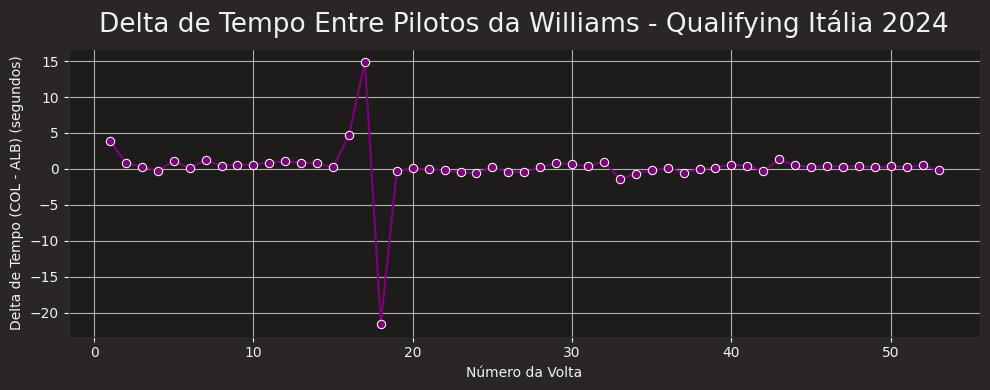

Estatísticas dos Tempos de Volta:
        count       mean       std     min     25%     50%     75%      max
Driver                                                                     
ALB      53.0  85.814774  3.185222  83.918  84.678  85.074  85.946  106.033
COL      53.0  86.076132  3.395932  83.728  84.784  85.147  86.289  106.349

Delta de Tempo Médio:
0.2613584905660383

Delta de Tempo Máximo:
14.912999999999997

Delta de Tempo Mínimo:
-21.548000000000002


In [ ]:
# Criar o gráfico de delta de tempo
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=delta_time,
             x='LapNumber',
             y='Delta',
             marker='o',
             color='purple',
             ax=ax)

ax.set_xlabel('Número da Volta')
ax.set_ylabel('Delta de Tempo (COL - ALB) (segundos)')
ax.set_title('Delta de Tempo Entre Pilotos da Williams - Qualifying Itália 2024')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir algumas estatísticas interessantes
print("Estatísticas dos Tempos de Volta:")
print(combined_laps.groupby('Driver')['LapTime (s)'].describe())
print("\nDelta de Tempo Médio:")
print(delta_time['Delta'].mean())
print("\nDelta de Tempo Máximo:")
print(delta_time['Delta'].max())
print("\nDelta de Tempo Mínimo:")
print(delta_time['Delta'].min())